3.작업형 제3유형

01 A 도시의 교통수단은 버스, 지하철, 택시, 자전거가 있다. 전문가들은 각 교통수단의 실제 선택 비율이 각각 40%, 30%, 20%, 10% 라고 예측했다. 이를 검증하기 위해 대중교통 이용객들이 선호하는 교통수단에 대해 설문조사를 했다. 이를 위해 수립한 귀무가설과 대립가설은 아래와 같다. 이에 대한 검정을 진행하시오.

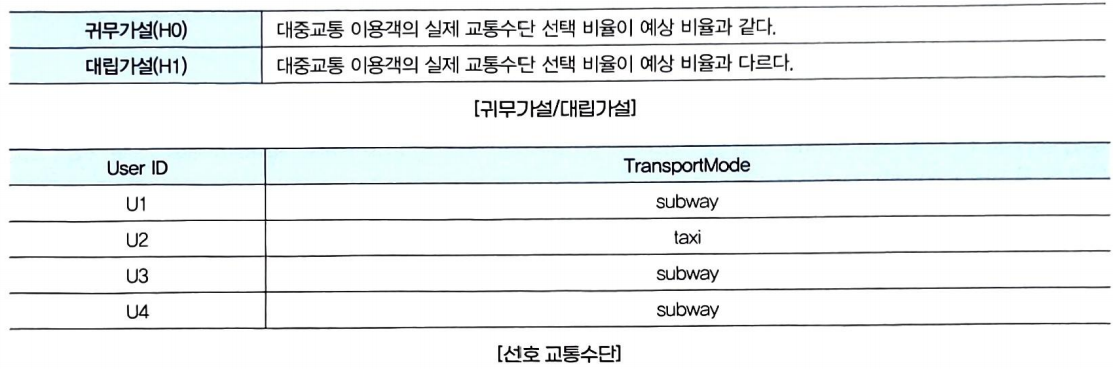

(1) 주어진 설문조사 데이터에서 전체 건수 대비 Subway를 선호하는 이용자의 비율을 구하시오. (단, 반올림하여 소수점 둘째 자리까지 계산한다.)

(2) 예상 이용자 수와 실제 이용자 수가 동일한 비율을 보이는지 적합도를 검정하고 검정통계량을 소수 둘째 자리로 반올림하시오.

(3) 위의 통계량에 대한 p-value를 구하고, 유의수준 0.05하에서 가설 검정의 결과를 채택. 기각 중 하나로 선택하시오.   
(단, p-value 값은 반올림하여 소수점 둘째 자리까지 계산한다.)

In [12]:
# 1번 문제 풀이
# library import
import pandas as pd
import scipy.stats as stats

file = '/content/06.03.01-transport_data.csv'
df = pd.read_csv(file)
# print(df.info())

# subway를 선호하는 이용자의 비율을 구하기 위해 TransportMode별 카운트를 수행한 후 인덱스를
# 기준으로 정렬하여 관찰 데이터를 만든다. 이 데이터를 이용하여 지하철 선호 이용자 비율을 구한다.
# 관찰 데이터 만들기
observed_data = df['TransportMode'].value_counts().sort_index() # 자전거, 버스, 지하철, 택시 순 정렬
# print(observed_data)

# 지하철 선호 이용자 비율 구하기
total_counts = sum(observed_data)
subway_ratio = observed_data['subway'] / total_counts
subway_ratio = round(subway_ratio, 2)
print(subway_ratio)
# 1번 문제 답 : 0.29

# (2) 예상 이용자 수와 실제 이용자 수가 동일한 비율을 보이는지 적합도를 검정하고
# 검정통계량을 소수 둘째 자리로 반올림하시오.
# 기대 빈도 만들기 - 버스, 지하철, 택시, 자전거 0.4 0.3 0.2 0.1
expected_data = pd.Series(
    {'bus' : total_counts * 0.4,
     'subway' : total_counts * 0.3,
     'taxi' : total_counts * 0.2,
     'bicycle' : total_counts * 0.1
    }
)
# 자전거, 버스, 지하철, 택시 순으로 정렬
expected_data = expected_data.sort_index(ascending=True)

# 기대 빈도
expected_counts = expected_data.values
# print(expected_counts)

# 관찰(실제) 빈도 만들기
observed_counts = observed_data.values
# print(observed_counts)

# 생성한 기대빈도와 관찰빈도를 이용하여 검정통계량과 p-value를 구한다.
# python의 scipy.stats 패키지의 chisqare를 이용한다.
# 이 문제에서 사용하는 chisquare 테스틑 적합도 검증에 해당한다. 적합도 검증은
# 범주형 변수 하나를 대상으로 기대빈도와 관찰빈도의 적합도를 검증하는 방법이다.

# 검정통계량, pval 구하기
stat, pval = stats.chisquare(list(observed_counts), list(expected_counts))
stat = round(stat, 2)
print(stat)
# 2번 문제 정답 : 2.77

# (3) 위의 통계량에 대한 p-value를 구하고, 유의수준 0.05하에서 가설 검정의 결과를
# 채택. 기각 중 하나로 선택하시오.
# (단, p-value 값은 반올림하여 소수점 둘째 자리까지 계산한다.)

# 2번 문제 풀이에서 검정통계량과 함께 구한 p-value를 이용하여 가설 검정 결과를 채택하거나
# 기각할 수 있다. 본 문제에서는 p-value가 0.05보다 크기 때문에 귀무가설을 기각하지 못하고
# 채택한다.

# 채택 기각 하기
result = '기각'

if pval >= 0.05:
    result = '채택'  # 귀무가설

print(result)
# 3번 문제의 답은 '채택' 이다.

0.29
2.77
채택
